# <div align="center">**<font size="10">P4DS FINAL PROJECT</font>**</div>

|ID's Student|Fullname|
|---------------|---------|
|20127049|Nguyễn Đức Minh|
|20127092|Nguyễn Minh Tuấn|

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy import stats
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

1. Tìm nguồn dữ liệu hợp pháp trên Kaggle

| Column_Name | Description |
| --- | --- |
| `age` | Age of primary beneficiary |
| `sex` | Insurance contractor gender, female, male |
| `bmi` | Body mass index that is related to height and weight |
| `children` | Number of children covered by health insurance / Number of dependents |
| `smoker` | Smoking |
| `region` | the beneficiary's residential area in the US, northeast, southeast, southwest, northwest |
| `charges` | Individual medical costs billed by health insurance |

$$ BMI = \frac{weight}{{(height)}^2} $$
$height(meters)  $  
$weight(kilograms)$

2. Khám phá dữ liệu và tiền xử lý

In [2]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
num_rows = data.shape[0]
num_cols = data.shape[1]
print('Number of Rows:', num_rows)
print('Number of Columns:', num_cols)

Number of Rows: 1338
Number of Columns: 7


In [4]:
data[data.duplicated() == True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [16]:
print('Number of Null values: ')
data.isna().sum()

Number of Null values: 


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Có 1 dòng duplicated nhưng sẽ không xóa vì có thể là mua hai lần hoặc có 2 ng mua có dữ liệu giống nhau.  
Đồng thời chỉ có một dòng duplicated so với số lượng 1338 dòng nên giữ lại cũng không ảnh hưởng.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='charges', ylabel='children'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='children', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

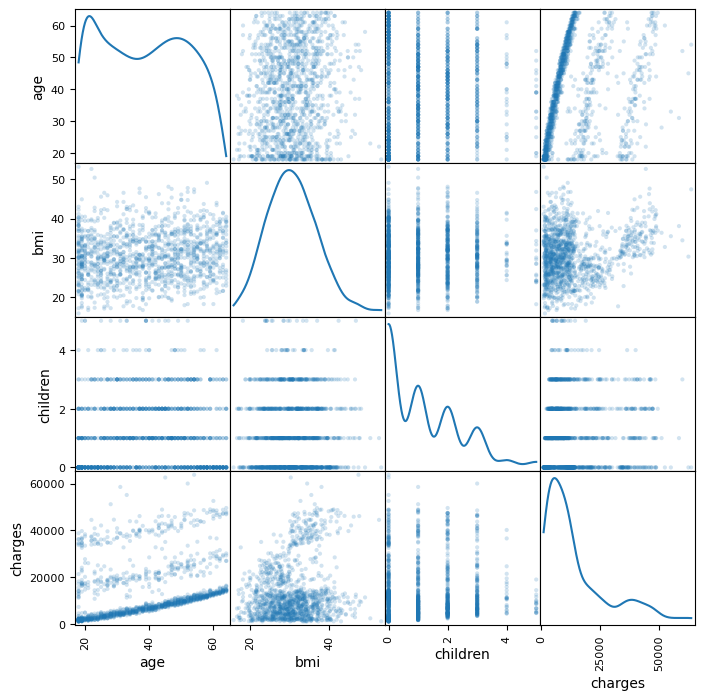

In [7]:
scatter_matrix(data, alpha = 0.2, figsize = (8, 8), diagonal = 'kde')

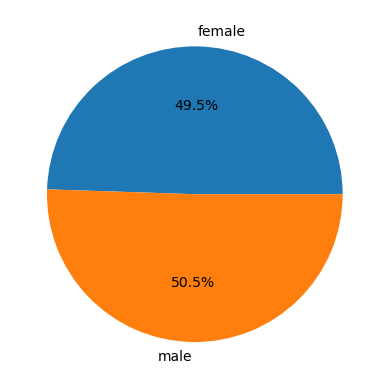

In [8]:
sex_ratio = Counter(data['sex'])
sex_ratio = dict(sex_ratio)
total = sum(sex_ratio.values())
sex_ratio = {k : sex_ratio[k] / total * 100 for k in sex_ratio}

plt.pie(sex_ratio.values(), labels = sex_ratio.keys(), autopct='%1.1f%%')
plt.show()

In [9]:
X = data.drop("charges", axis = 1)
lb_make = LabelEncoder()
X["sex"] = lb_make.fit_transform(X["sex"])
X["smoker"] = lb_make.fit_transform(X["smoker"])
X["region"] = lb_make.fit_transform(X["region"])

X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [10]:
X_norm = (X - X.min())/(X.max() - X.min())
X_norm

,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.321227,0.0,1.0,1.000000
1,0.000000,1.0,0.479150,0.2,0.0,0.666667
2,0.217391,1.0,0.458434,0.6,0.0,0.666667
3,0.326087,1.0,0.181464,0.0,0.0,0.333333
4,0.304348,1.0,0.347592,0.0,0.0,0.333333
...,...,...,...,...,...,...
1333,0.695652,1.0,0.403820,0.6,0.0,0.333333
1334,0.000000,0.0,0.429379,0.0,0.0,0.000000
1335,0.000000,0.0,0.562012,0.0,0.0,0.666667
1336,0.065217,0.0,0.264730,0.0,0.0,1.000000


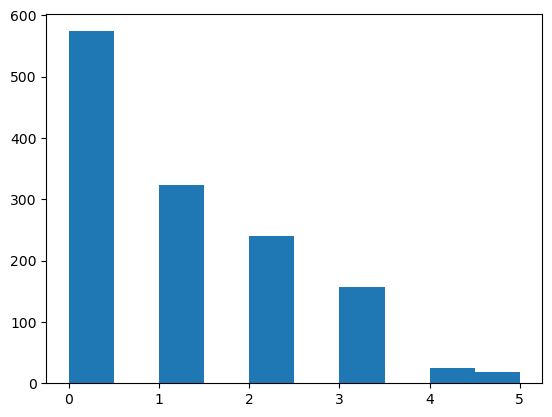

In [11]:
plt.hist(X['children'])
plt.show()

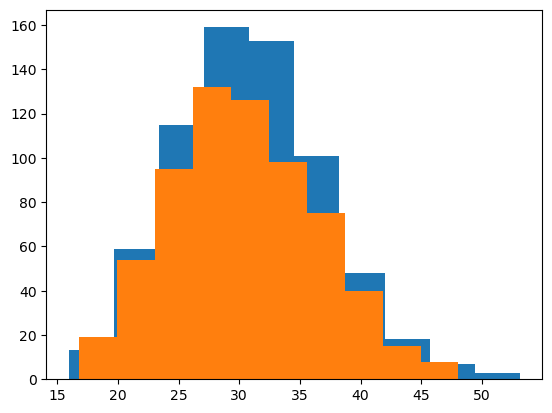

In [12]:
val = data[data['sex'] == 'male']
plt.hist(val['bmi'])

val = data[data['sex'] == 'female']
plt.hist(val['bmi'])

plt.show()

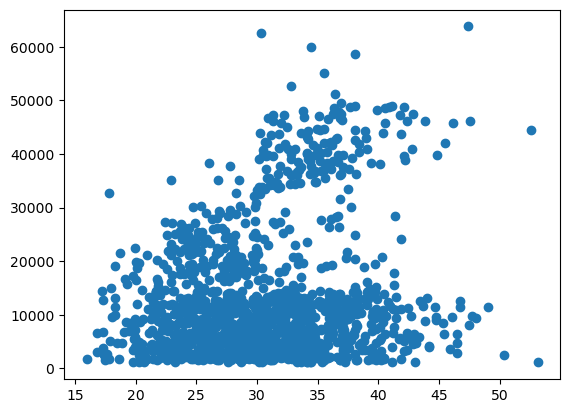

In [13]:
plt.scatter(data['bmi'], data['charges'])

/home/vttthao/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


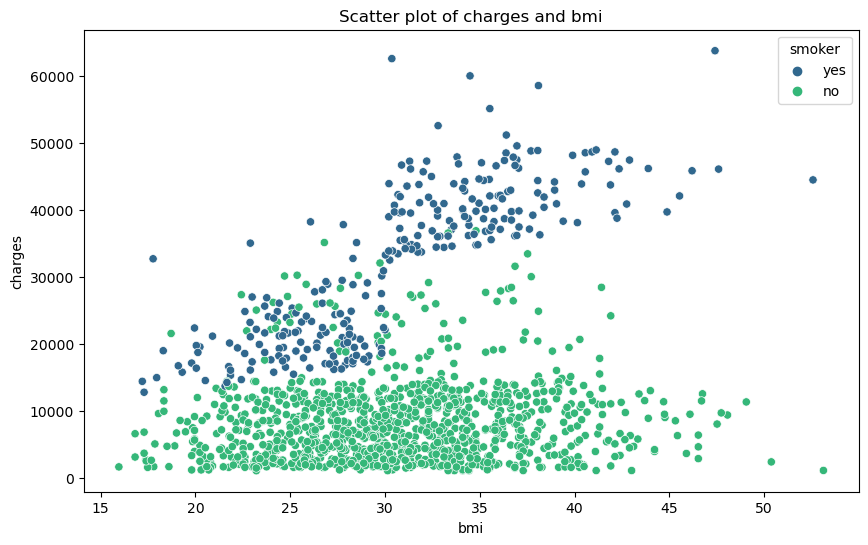

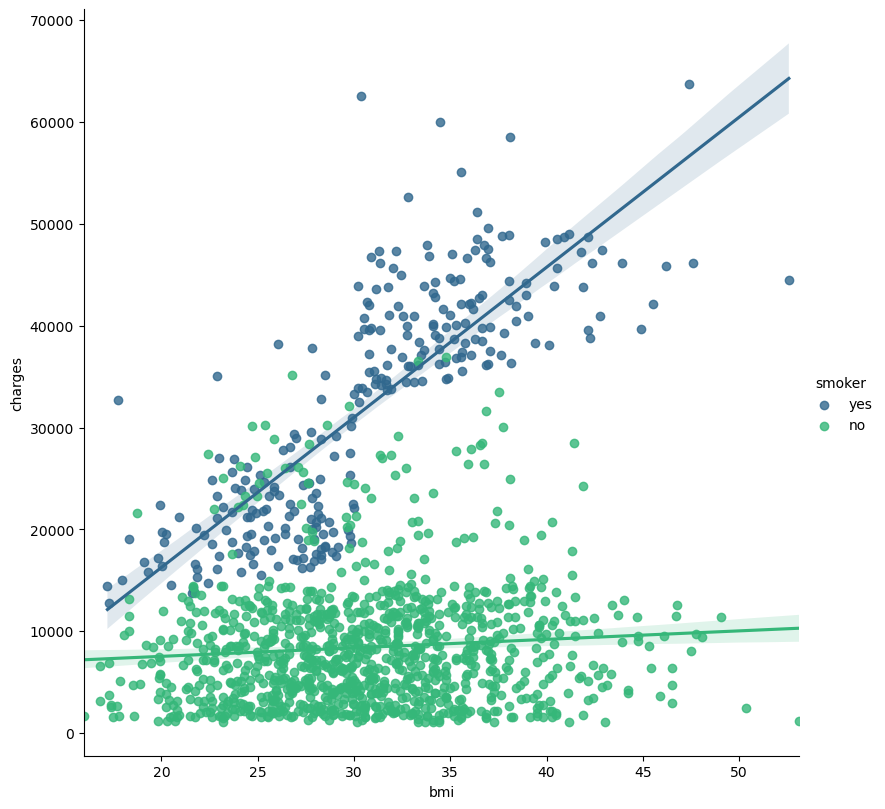

In [14]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'viridis', size = 8)